# Lesson 8

## 00:01:58 - What we've learned so far

### 00:02:14 - Differentiable programming

* Should be called deep learning, should be called "differentiable programming".
  * "Stacks of differentiable non-linear functions with lots of parameters solve nearly any predictive modeling problem".
  * Can experiment with differentiable programs at http://playground.tensorflow.org/
 
### 00:03:24 - Transfer learning

* Transfer learning = more important thing to do DL effectively.
  * All research papers focus on starting with random weights, but you almost never want to do that.
  
### 00:05:16 - Architectures

* Didn't talk much about architecture design: less and less interesting.
  * Small range of architectures that work well most of the time.

* General architecture uses:
  * CNN for fixed-size ordered data.
  * RNNs for sequences.
  * Softmax for categories.
  * Relu for inner activations.

### 0:06:27 - Avoiding overfitting

* Want to start with a model that overfits, so you ensure that it can actually learn from the data.

* Then, take these steps:
  1. More data.
  2. Data augmentation.
  3. Generalizable architectures.
  4. Regularization.
  5. Reduce architecture complexity.
  
### 00:07:51 - Embeddings (for NLP and any categorical data)

* Since Part 1 came out, lots more examples of embedding for categorical data.

## 00:08:55 - Part 1 vs Part 2

* Part 1 = best practises in Deep Learning.
* Part 2 = cutting edge.
  * Jeremy doesn't know best params / architectures for problems.
  * Requires lots of fastai customization.
  * Need to know Python well.
  * Code samples online always have problems.
    * Expect to have to deal with issues.
  
## 00:14:18 - Working through notebooks

* What should I do after the lesson? How do I know if I've got it?
  * Don't open notebook and blindly run it: idea of the notebook is to help you get through each step.
  * Course should give you enough info to know how to experiment, but may need to ask "why" is it doing it?
  
## 00:16:51 - Building your own box

* Can build a box for a total of $550:
  * Processor (AMD FX 6300) + motherboard - $110
  * RAM (8GB) - $30
  * ASUS GTX 1070 - $350
  * Case - $30
  * HDD - $20

* GPU:
  * K80 (EC2 P2 and Google Collab) are generally 3x as slow as a GPU you'd buy yourself.
  * Best price/performance in the GTX 1080ti.
  * GTX 1070 (8GB RAM) is good too.

* CPU and RAM:
  * Motherboard should support > 64GB RAM.
  * i5 or i7 CPU is fine.
  * CPU speed matters for image rec (not for NLP so much)
    * Speed of data augmentation affected by CPU.

* Storage:
  * NVMe drives!
  * Get biggest you can afford.
  * Use standard HDs for rest of space.
  
* Other:
  * pcpartpicker.com is useful.
  * Ensure you have x8 PCI lanes for GPU.
  
  
## 00:21:38 - Reading papers

* Familiar stuff can look complex in papers.
* Don't usually refactor much: same sub-equation will appear a number of times.
* Good idea to put in some effort to understand a paper, then write a blog explaining it with code and English.
* Useful to learn greek letters.

## 00:25:25 - Opportunities

* Lesson teaches cutting edge, so lots of people don't know about it.
* Course goal is to introduce people who are in fields other than ML to Deep Learning.
* Want to experiment lots.
* Blog and communicate lots.

## 00:30:16 - What we'll study

* Overarching theme of Part 2: Generative Models.
* CNNs beyond classification:
  * Localization
  * Enhancement:
    * Colourization
    * Super-resolution
    * Artistic style
  * GANs
* NLP beyond classification:
  * Translation
  * Seq2seq
  * Attention
  * Large vocabularies
* Large data sets

* No more time series / tabular data: all lessons already taught in ML course and DL Part 1.

## 00:35:32 - Object Detection

* Return bounding boxes as well as class predictions.
* Bounding box: rectangle that contains entire object and is no bigger than it has to be.
* Labelling bounding box data tends to be more expensive: more work to do for labelers.

### 00:38:34 - Object detection stages

1. Start out by classifying largest object in each image.
2. Return location of largest object in image.
3. Return both where and what is in an image.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.fastai.conv_learner import *
from fastai.fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

* `pathlib`
  * Part of standard lib in Python 3.
  * Gives you object oriented access to paths.

In [8]:
PATH = Path('./data/pascal')

In [13]:
PATH.mkdir()

In [20]:
list(PATH.iterdirerdirerdirerdir())

[PosixPath('data/pascal/VOCdevkit'), PosixPath('data/pascal/PASCAL_VOC.zip')]

In [ ]:
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar --directory-prefix {PATH}

In [14]:
!tar -xf ./data/VOCtrainval_06-Nov-2007.tar -C {PATH}

* Download annotations

In [22]:
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip --directory-prefix {PATH}

--2018-05-19 15:02:17--  https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
Resolving storage.googleapis.com... 216.58.199.80
Connecting to storage.googleapis.com|216.58.199.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998182 (1.9M) [application/zip]
Saving to: ‘data/pascal/PASCAL_VOC.zip’

PASCAL_VOC.zip      100%[===================>]   1.91M  2.81MB/s    in 0.7s    

2018-05-19 15:02:18 (2.81 MB/s) - ‘data/pascal/PASCAL_VOC.zip’ saved [1998182/1998182]



In [25]:
!unzip {PATH}/PASCAL_VOC.zip -d {PATH}

Archive:  data/pascal/PASCAL_VOC.zip
   creating: data/pascal/PASCAL_VOC/
  inflating: data/pascal/PASCAL_VOC/pascal_test2007.json  
  inflating: data/pascal/PASCAL_VOC/pascal_train2007.json  
  inflating: data/pascal/PASCAL_VOC/pascal_train2012.json  
  inflating: data/pascal/PASCAL_VOC/pascal_val2007.json  
  inflating: data/pascal/PASCAL_VOC/pascal_val2012.json  


* Slash operator is overriden for Paths, to support stepping into child directory.

In [28]:
trn_j = json.load((PATH / 'PASCAL_VOC' / 'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

* Useful for tab completion in Juypter:

In [29]:
IMAGES, ANNOTATIONS, CATEGORIES = ['images', 'annotations', 'categories']

In [31]:
trn_j[IMAGES][:2]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17}]

* Annotation contains:
  * Bounding box (x, y, height, width)
  * Includes image and category id

In [33]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [34]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

* Want to get an id => name dictionary.

In [35]:
FILE_NAME, ID, IMG_ID, CAT_ID, BBOX = 'file_name', 'id', 'image_id', 'category_id', 'bbox'

In [36]:
cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]

* Want to adjust dataset to match the way you would have designed it.

In [37]:
(PATH/'VOCdevkit'/'VOC2007').iterdir()

<generator object Path.iterdir at 0x1c1e470410>

In [38]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [39]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [41]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/003301.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/006279.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/008254.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/007167.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/000608.jpg')]

* Each image has a unique ID

In [42]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME], im0_d[ID]

('000012.jpg', 12)

* Convert hight/width into top-left/bottom-right, and switch x/y coords to be numpy consistent.

In [44]:
trn_anno = collections.defaultdict(list)

for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = np.array([
            bb[1], bb[0], bb[3] + bb[1] - 1, bb[2] + bb[0] - 1])
        trn_anno[o[IMG_ID]].append((bb, o[CAT_ID]))

len(trn_anno)

2501

* Jeremy believes names should be long enough to have a mnemonic but short enough to maximise screen real estate.
* Not have a dictionary of filenames to a tuple containing:
  x1, y1, x2, y2  and the category.

In [45]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [46]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [47]:
cats[7]

'car'

* If you don't like the format of a dataset, then change it.
* Some libraries take VOC formatted bounding boxes, so we can create a function to convert back:

In [49]:
def bb_hw(a):
    return np.array([
        a[1], a[0], a[3] - a[1], a[2] - a[0]])

In [52]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

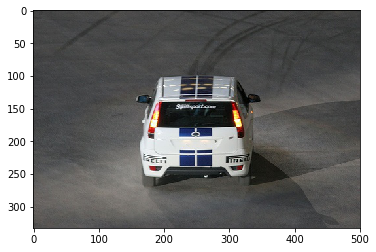

In [53]:
plt.imshow(im)

## 01:03:16 - Exploring a code base in vscode

## 01:10:56 - opencv (why Fast.ai uses it)

* Using cv2 (opencv library).
* Torchvision uses PyTorch tensors for all data augmentation.
* Pillow common.
* Opencv is 5 to 10x faster than Torchvision.
* Pillow is faster, but not as fast as opencv.
* Opencv is mostly thread safe.
* Opencv has a pretty average API and the documentation can be hard to read.
* When using Fast.ai, want to ensure you're using opencv for image processing.

## 01:14:46 - matplotlib

* Called matplotlib because it started out as a clone of Matlab's plotting library.
* Added a second object oriented API, but not many people use it because so many people are familiar with Matlab's style.
* `plot.subplots` returns a `Figure` and an `Axis` object, which can be used for all the things you normally use `plt.<method>` for (eg `ax.imshow`).

In [54]:
def show_img(im, figsize=None, ax=None):
    """
    ax can be passed in or created inline.
    """
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

* Simple but rare trick to make text visible regardless of background is the use white text with black outline:

In [55]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()
    ])

In [57]:
def draw_rect(ax, b):
    patch = ax.add_patch(
        patches.Rectangle(
            b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [59]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(
        *xy, txt, verticalalignment='top', color='white',
        fontsize=sz, weight='bold')
    draw_outline(text, 1)

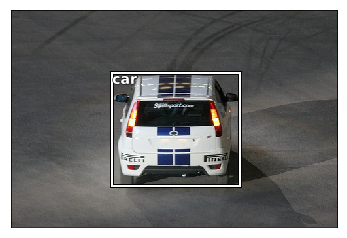

In [61]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [62]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16, 8))
    for b, c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [63]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH / trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


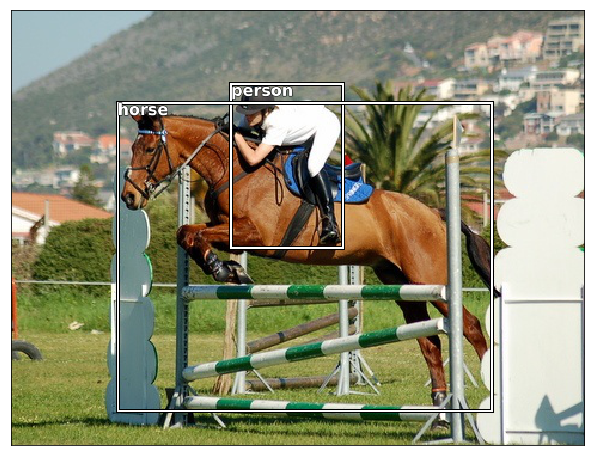

In [64]:
draw_idx(17)

* Want to setup your project so you can rapidly explore your dataset.

### 01:22:56 - Largest image classifier

* Good idea to structure your project so you're making incremental improvements.